In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./datasets/train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data = data.drop(['PassengerId','Name','Ticket'],axis=1)

In [8]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [10]:
data_seq = data.Survived.value_counts()

In [21]:
data_seq

0    549
1    342
Name: Survived, dtype: int64

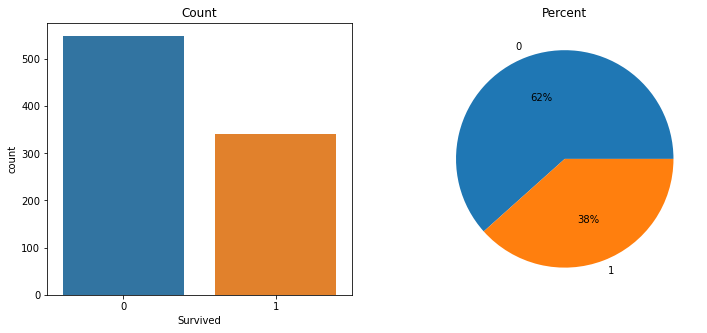

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot(x='Survived',data=data)
plt.title('Count')
plt.subplot(122)
plt.pie(data_seq,labels=data_seq.index,autopct='%1.0f%%')
plt.title('Percent')
plt.show()

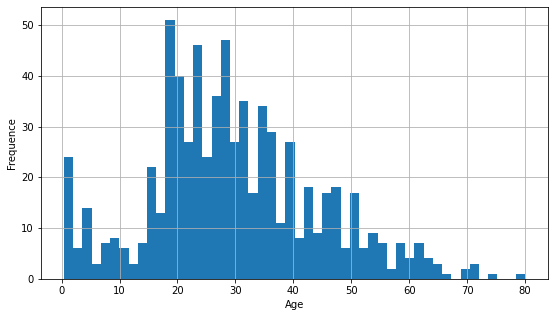

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(121)
data['Age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.show()

In [32]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
data.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

,Survived,Pclass,Age,SibSp,Parch,Fare
0.1,0.0,1.0,14.0,0.0,0.0,7.5500
0.2,0.0,1.0,19.0,0.0,0.0,7.8542
0.3,0.0,2.0,22.0,0.0,0.0,8.0500
0.4,0.0,2.0,25.0,0.0,0.0,10.5000
0.5,0.0,3.0,28.0,0.0,0.0,14.4542
0.6,0.0,3.0,31.8,0.0,0.0,21.6792
0.7,1.0,3.0,36.0,1.0,0.0,27.0000
0.8,1.0,3.0,41.0,1.0,1.0,39.6875
0.9,1.0,3.0,50.0,1.0,2.0,77.9583
1.0,1.0,3.0,80.0,8.0,6.0,512.3292


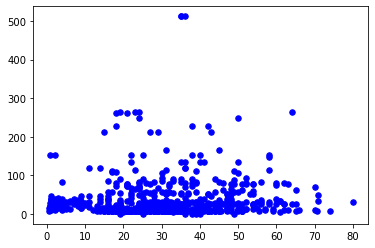

In [43]:
plt.scatter(data.Age,data.Fare,30,'blue')
plt.show()

In [41]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [46]:
pd.crosstab(data.Survived,data.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [47]:
pd.crosstab(data.Survived,data.Pclass).apply(lambda x : x/x.sum(),axis=1)

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953


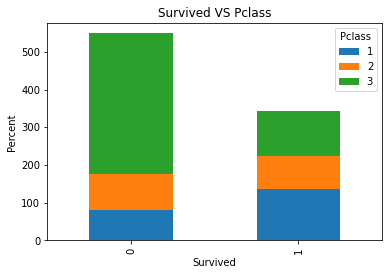

In [48]:
data1 = pd.crosstab(data.Survived,data.Pclass)
data1.plot(kind='bar',stacked=True)
plt.title('Survived VS Pclass')
plt.ylabel('Percent')
plt.show()

In [49]:
dropna = data.dropna()

In [51]:
dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Sex       183 non-null    object 
 3   Age       183 non-null    float64
 4   SibSp     183 non-null    int64  
 5   Parch     183 non-null    int64  
 6   Fare      183 non-null    float64
 7   Cabin     183 non-null    object 
 8   Embarked  183 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 14.3+ KB


In [56]:
Age_dropna = data[['Age']].dropna()
Age_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


In [57]:
data['Age_isna']=0
data.loc[data['Age'].isnull(), 'Age_isna'] = 1
data['Age_isna'].value_counts()

0    714
1    177
Name: Age_isna, dtype: int64

In [58]:
data.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna
0,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0
5,0,3,male,NaN,0,0,8.4583,NaN,Q,1
6,0,1,male,54.0,0,0,51.8625,E46,S,0
7,0,3,male,2.0,3,1,21.0750,NaN,S,0
8,1,3,female,27.0,0,2,11.1333,NaN,S,0
9,1,2,female,14.0,1,0,30.0708,NaN,C,0


In [60]:
Age_mean = round(data['Age'].mean())
Age_mean

30

In [62]:
data['Age'].fillna(Age_mean,inplace=True)
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_isna
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208,0.198653
std,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429,0.399210
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [64]:
Pclass_onehot = pd.get_dummies(data.Pclass,prefix='Pclass')

In [65]:
Pclass_onehot.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [66]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna
0,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,0
887,1,1,female,19.0,0,0,30.0000,B42,S,0
888,0,3,female,30.0,1,2,23.4500,NaN,S,1
889,1,1,male,26.0,0,0,30.0000,C148,C,0


In [67]:
Sex_onehot = pd.get_dummies(data.Sex,prefix='Sex')

In [69]:
Sex_onehot.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [70]:
cut_points = [1,18,25,40,60,80,100]
data['Age_bin'] = pd.cut(data.Age,bins=cut_points)

In [76]:
data['Age_bin'].value_counts().sort_values(ascending=False)

(25, 40]     440
(18, 25]     162
(40, 60]     128
(1, 18]      125
(60, 80]      22
(80, 100]      0
Name: Age_bin, dtype: int64

In [77]:
Age_bin_onehot = pd.get_dummies(data['Age_bin'],prefix='Age_bin')
Age_bin_onehot.head()

,"Age_bin_(1, 18]","Age_bin_(18, 25]","Age_bin_(25, 40]","Age_bin_(40, 60]","Age_bin_(60, 80]","Age_bin_(80, 100]"
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler()

In [80]:
emo = [[1,2],
       [0.4,7],
       [0.8,11],
       [1,18]
]

In [81]:
scaler.fit(emo)

MinMaxScaler()

In [83]:
scaler.data_max_

array([ 1., 18.])

In [84]:
scaler.data_min_

array([0.4, 2. ])

In [87]:
scaler.transform(emo)

array([[1.        , 0.        ],
       [0.        , 0.3125    ],
       [0.66666667, 0.5625    ],
       [1.        , 1.        ]])

In [108]:
import numpy as np
x= pd.Series([1,3,5,7,9,11])
y= pd.Series([1,-3,-7,-12,-15,-19])

In [109]:
r = x.corr(y,method='pearson')
r

-0.9985611984785477

In [113]:
arr = np.random.randint(0,10,size=(10,2))

In [115]:
re = pd.Series(arr[:,0]).corr(pd.Series(arr[:,1]),method='pearson')

In [116]:
re

0.1610712848522916

In [6]:
import pandas as pd
import pymysql

In [7]:
conn = pymysql.connect(host='localhost',user='root',password='123456',database='20211122',charset='utf8')

In [8]:
cursor = conn.cursor()

In [17]:
sql = 'select * from salesinfo'

In [18]:
df = pd.read_sql(sql,conn)

In [19]:
df

,month,userid,ye
0,一月份,1,10
1,一月份,2,10
2,一月份,3,5
3,二月份,2,8
4,二月份,4,9
5,三月份,3,8
6,三月份,5,6
